In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from cataclop.ml import preprocessing
from cataclop.ml import exploration

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline import factories

In [2]:
program = factories.Program.factory('default', version='1.1')

In [3]:
program.train(dataset_params = {
    #'from': '2013-05-10'
    'from': '2017-01-01',
    'to': '2018-12-01',
    'categories': ['PLAT']
}, model_params = {
    'kfolds': 3,
    'nan_flag': 100000
})

loading data 2478b08edac2d9e7911675e764ea589b from cache
preparing model data
training xgb_10
mea: 2909.1092646787774
training xgb_30
mea: 2908.5442981915457
training xgb_100
mea: 2908.531373925372
training ridge_0.1
mea: 10148.073831106602
training ridge_1
mea: 12241.142594116727
training lasso_0.1
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
mea: 50455.52784982178
training lasso_1
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)

In [4]:
len(program.model.models[0]['estimators'])
program.model.hash

'd0942da38b381c194c08679272e3c9b4'

In [5]:
program.dataset.save()
program.model.save()

In [6]:
print('{} races from {} to {}'.format(program.df.race_id.nunique(), program.df.start_at.min(), program.df.start_at.max()))

9343 races from 2017-01-01 12:40:00 to 2018-11-22 21:15:00


In [7]:

for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


for model in program.model.stacked_models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


xgb_10
hist_1_pos                                         0.157143
handicap_weight_r                                  0.100000
odds_7                                             0.085714
victory_earnings_r                                 0.085714
hist_3_pos                                         0.085714
declared_player_count                              0.057143
odds_6                                             0.057143
odds_4                                             0.057143
odds_9                                             0.042857
handicap_weight                                    0.042857
odds_2                                             0.042857
prev_year_earnings_r                               0.028571
odds_8                                             0.028571
odds_3                                             0.028571
victory_earnings                                   0.014286
hist_4_pos                                         0.014286
placed_2_count_r                 

In [8]:
df = program.df

for model in program.model.models:
    print(model['name'], df['pred_{}_1'.format(model['name'])].mean())

xgb_10 11.000808008424931
xgb_30 16.465722798415023
xgb_100 17.79091936713961
ridge_0.1 -6958.140594397185
ridge_1 -7789.002518342838
lasso_0.1 -15049.210846296866
lasso_1 -9508.19058091605
knn_5 15.562435487598211
knn_10 15.602384551686953
knn_20 15.344875259975353
knn_30 15.190031261233505
gbr_10 16.47490155431067
gbr_30 16.974000878202926
gbr_100 17.909913451792274
rf_10 21.70033669054589
rf_30 21.367412455809795
rf_100 21.11931891778143


In [16]:
#exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref', 'pred_stacked'] + ['pred_stacked_{}'.format(pos+1) for pos in range(1,8)] + ['pred_xgb_100_1', 'pred_rf_100_1', 'pred_knn_5_1', 'pred_mlp_100_1', 'pred_ridge_1_1']).sort_values(by='pred_stacked_8', ascending=False)
exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref'] + ['pred_{}_1'.format(model['name']) for model in program.model.models] + ['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models]).sort_values(by='position', ascending=True)



position  declared_player_count         sub_category  num  \
race_id                                                                    
22120   93236       1.0                      7  COURSE_A_CONDITIONS    2   
        93241       2.0                      7  COURSE_A_CONDITIONS    7   
        93238       3.0                      7  COURSE_A_CONDITIONS    4   
        93237       4.0                      7  COURSE_A_CONDITIONS    3   
        93235       5.0                      7  COURSE_A_CONDITIONS    1   
        93240       6.0                      7  COURSE_A_CONDITIONS    6   
        93239       7.0                      7  COURSE_A_CONDITIONS    5   

               final_odds  final_odds_ref  pred_xgb_10_1  pred_xgb_30_1  \
race_id                                                                   
22120   93236         7.2             5.3       8.749713      11.739910   
        93241         3.2             4.9       9.881634      13.489716   
        93238         3.3             2.2       6.957224       7.553622   
        93237         5.6             6.6       6.957224       8.176391   
        93235         7.1            10.9       8.255396      13.540854   
        93240        19.7            21.8       8.147225      12.741778   
        93239        21.2            20.6       9.027678      10.610634   

               pred_xgb_100_1  pred_ridge_0.1_1  pred_ridge_1_1  \
race_id                                                           
22120   93236       11.253304         19.039341       18.798201   
        93241       12.010395         49.839625       49.291955   
        93238        6.540698         14.642342       14.428080   
        93237        7.050097         16.282773       16.036157   
        93235       10.600389         51.630235       51.082457   
        93240       15.479028         18.313625       18.046002   
        93239        9.574680         21.820213       21.546384   

               pred_lasso_0.1_1  pred_lasso_1_1  pred_knn_5_1  pred_knn_10_1  \
race_id                                                                        
22120   93236          7.399010       11.752684         12.56          10.06   
        93241         30.000713       12.553266         11.98          11.55   
        93238          4.333621       11.164321          8.00           8.99   
        93237          5.218501       11.732079         17.10          11.60   
        93235         30.870796       11.243100         11.70           9.14   
        93240          6.257501       11.894366         15.28          11.81   
        93239         10.236823       13.048215         11.98          12.47   

               pred_knn_20_1  pred_knn_30_1  pred_gbr_10_1  pred_gbr_30_1  \
race_id                                                                     
22120   93236         10.805       9.213333      15.446343      13.716576   
        93241         12.085      10.383333      16.052676      13.440037   
        93238         10.575       9.916667      12.275992       8.219060   
        93237         11.010       9.866667      12.275992       8.859196   
        93235         11.865      10.880000      13.450519      11.716183   
        93240         11.070       9.343333      15.509033      15.513866   
        93239         10.575      10.673333      13.512062       9.857853   

               pred_gbr_100_1  pred_rf_10_1  pred_rf_30_1  pred_rf_100_1  \
race_id                                                                    
22120   93236       12.806364         18.95     24.400000         20.523   
        93241       15.703786         18.81     19.090000         18.237   
        93238        6.785572          4.92      4.976667          6.821   
        93237       10.479391          5.29      6.200000          6.252   
        93235       12.288702         17.27     16.073333         16.873   
        93240       16.976519         19.62     15.036667         14.055   
        93239       11.3906

In [10]:
#df['pred_sum'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models ]].sum(axis=1)
#df['pred_sum'] = df[['pred_knn_{}_1'.format(n) for n in [5,10,20,30]]].sum(axis=1)
df['pred_sum'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models ]].sum(axis=1)

In [13]:
df['pred_rnd'] = np.random.rand(df.shape[0])

for model in program.model.models:
    df['pred_minus_ref_{}'.format(model['name'])] = df['pred_{}_1'.format(model['name'])] - df['final_odds_ref']
    
for model in program.model.stacked_models:
    df['pred_minus_ref_stacked_{}'.format(model['name'])] = df['pred_stacked_{}_1'.format(model['name'])] - df['final_odds_ref']

In [ ]:
#program.bet(N=1, max_odds=20, targets=['pred_rnd', 'final_odds_ref', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models])
#bets = program.bets
#bets['profit'].mean()

In [17]:
def bet(df, features, categorical_features, targets, N=1, max_odds=20, break_on_bet=True, break_on_odds=False):

    races = df.sort_values('start_at').groupby('race_id')

    bets = []

    for (id, race) in races:

        candidate_bets = []

        nums = []

        for target in targets:

            r = race.sort_values(by=target, ascending=False)

            if len(r) <= N:
                break
                
            NN = N

            for n in range(NN):

                player = r.iloc[n]

                odds = player['final_odds_ref']

                if max_odds is not None and odds > max_odds:
                    if break_on_odds:
                        break
                    else:
                        continue

                #nth = (r['final_odds_ref']<odds).sum()+1
                
                if player[target] < 0:
                    break

                bet = np.clip(player[target]/100.0, 0, 10)
                
                bet = np.round(1+bet) * 1.5
                
                if bet <= 0:
                    break
                
                if n+1 < len(r) and r.iloc[n+1][target] == player[target]:
                    NN = NN+1
                    
                bet = 1

                profit = player['winner_dividend']/100.0 * bet - bet

                row = [id, player['start_at'], player['num'], player['position'], n, odds, player['final_odds'], target, player[target], r[target].std(), bet, profit]

                for nn in range(1,4):
                    if n+nn < len(r):
                        row.append(r.iloc[n+nn][target])
                    else:
                        row.append(np.nan)

                for f in features:
                    row.append(player[f])
                for f in categorical_features:
                    row.append(player[f])

                candidate_bets.append( row )

                nums.append(player['num'])

                if break_on_bet:
                    break

        #if len(candidate_bets) == 1:
        #    bets += candidate_bets
        bets += candidate_bets

    cols = ['id', 'date', 'num', 'pos', 'nb', 'odds_ref', 'odds_final', 'target', 'pred', 'pred_std', 'bet', 'profit']

    for nn in range(1,4):
        cols.append('next_pred_{}'.format(nn))

    cols = cols + features + categorical_features

    bets = pd.DataFrame(bets, columns=cols)
    bets['date'] = pd.to_datetime(bets['date'])

    bets = bets.set_index(bets['date'])
    bets = bets.sort_index()

    bets['bets'] = bets['bet'].cumsum()
    bets['stash'] = bets['profit'].cumsum()

    return bets



In [19]:
bets = bet(df, program.model.features, program.model.categorical_features, 
    N=3, max_odds=30, break_on_bet=False, break_on_odds=False, 
    targets=['pred_rnd', 'final_odds_ref', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models] + ['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models] + ['pred_minus_ref_stacked_{}'.format(model['name']) for model in program.model.stacked_models] + ['pred_minus_ref_{}'.format(model['name']) for model in program.model.models]
   )
    

In [ ]:
bets['nb'].describe()

In [ ]:
df[['pred_{}_1'.format(model['name']) for model in program.model.models]].describe()

In [ ]:
bets = bets.set_index(bets['date'])
bets = bets.sort_index()

In [20]:
def graph_bb(bb, f):
    results = []

    for s in bb[f].value_counts().index:
        results = []
        x = bb[ (bb[f] == s) & (bb['pred_std'] != 0) & (bb['pred'] != 0) ].copy()
        if len(x) == 0:
            continue
        #print("---\n{}\t{:+.2f}\t{:+.2f}\t{:+.2f}\n---".format(s, x['profit'].sum(), x['bet'].sum(), len(x)))

        fig, axs = plt.subplots(1,1)

        for t in x['target'].value_counts().index:
            bbb = x[(x['target'] == t)].copy()
            #bbb = bbb[ (bbb['pred']>bbb['pred'].quantile(0.85)) ].copy()


            results.append({
                'idx_1': s,
                'idx_2': t,
                'profit': bbb.profit.sum(),
                'bet': bbb.bet.sum(),
                'bets': bbb.bet.count(),
                'avg': bbb.profit.sum() / bbb.bet.sum()
            })

            '''
            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            fig, axs = plt.subplots(1,1)
            bbb['stash'].plot(figsize=(6, 2))
            bbb['cbet'].plot(figsize=(6, 2))
            plt.show()
            '''

            #print("{:10s}: \t {:+.2f} \t {:+.0f} \t {:+.2f}".format(t, bbb.profit.sum(), bbb.profit.count(), bbb.profit.mean()) )

            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            bbb['stash'].plot(figsize=(10, 2))
            bbb['cbet'].plot(figsize=(10, 2))

        results = pd.DataFrame(results)
        results = results.set_index(['idx_1', 'idx_2'])
        print(results.sort_values(by='avg', ascending=False))


        plt.show()    

    
    

In [21]:
countries = list(bets['country'].value_counts()[0:10].index)
sub_categories = list(bets['sub_category'].value_counts()[0:10].index)

%store countries
%store sub_categories

Stored 'countries' (list)
Stored 'sub_categories' (list)


In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

target = 'pred_stacked_lasso_1'

c_min = bets[(bets['target'] == target)]['pred'].min()
c_mean = bets[(bets['target'] == target)]['pred'].mean()
c_max = bets[(bets['target'] == target)]['pred'].max()

space = [
          Real(1, 10, name='min_odds'),
          Real(10, 30, name='max_odds'),
          Real(c_min, c_mean, name='min_pred'),
          Real(c_mean, c_max, name='max_pred'),
          Integer(5, 25, name='max_players')] + [
          Integer(0,1, name='country_{}'.format(country)) for country in countries] + [
          Integer(0,1, name='sub_category_{}'.format(sub_category)) for sub_category in sub_categories] + [
          Integer(0,1, name='nb_{}'.format(n)) for n in range(0,3)]
         
def x_to_params(x):
    params = {}
    
    params['min_odds'] = x[0]
    params['max_odds'] = x[1]
    params['max_pred'] = x[3]
    params['min_pred'] = x[2]
    params['max_players'] = x[4]
    
    for i, country in enumerate(countries):
        params['country_{}'.format(country)] = x[5+i]
        
    for i, sc in enumerate(sub_categories):
        params['sub_category_{}'.format(sc)] = x[5+len(countries)+i]
        
    for n in range(0,3):
        params['nb_{}'.format(n)] = x[5+len(countries)+len(sub_categories)+n]

    return params

@use_named_args(space)
def f(**params):
    return ff(params)
    
def ff(params, train=True):
    
    print(params)
    
    b = bets[ (bets['target']==target) & (bets['pred_std'] != 0)]
    
    b = b[ (b['odds_ref'] > params['min_odds']) & (b['odds_ref'] < params['max_odds']) & (b['declared_player_count'] > 1) & (b['declared_player_count'] <= params['max_players']) ]
    
    b = b[(b['pred'] > params['min_pred']) & (b['pred'] < params['max_pred'])]
    
    for country in countries:
        if params['country_{}'.format(country)] == 0:
            b = b[ b['country'] != country ]
            
    for sub_category in sub_categories:
        if params['sub_category_{}'.format(sub_category)] == 0:
            b = b[ b['sub_category'] != sub_category ]
            
    for n in range(0,3):
        if params['nb_{}'.format(n)] == 0:
            b = b[ b['nb'] != n]
    
    p = b.profit.sum()
    bet = b.bet.sum()
    
    print("{:+.2f} {:+.2f}\n".format(p, bet))
        
    if bet == 0:
        return 0
    
    if not train:
        return b
    
    return - (p+np.log(b.bet.count()))
    
    

In [ ]:
c_mean, c_min, c_max

In [ ]:
from skopt import dummy_minimize, gp_minimize, gbrt_minimize

res = dummy_minimize(f, space, n_calls=10)

In [ ]:
x_to_params(res.x), res.fun

In [ ]:
params = x_to_params(res.x)
%store params
params

In [ ]:
#%store -r params
#%store -r countries
#%store -r sub_categories

In [ ]:
bb = ff(params, False)

                                         avg   bet  bets  profit
idx_1 idx_2                                                     
PLAT  pred_minus_ref_lasso_1        0.904348    92    92    83.2
      final_odds_ref                0.286542   535   535   153.3
      pred_minus_ref_knn_20         0.110539   427   427    47.2
      pred_minus_ref_lasso_0.1      0.094208   846   846    79.7
      pred_minus_ref_knn_30         0.068121   298   298    20.3
      pred_minus_ref_knn_10         0.056160   625   625    35.1
      pred_minus_ref_ridge_1        0.024960  1238  1238    30.9
      pred_minus_ref_ridge_0.1      0.021659  1242  1242    26.9
      pred_minus_ref_gbr_10        -0.013725   102   102    -1.4
      pred_minus_ref_knn_5         -0.023280   945   945   -22.0
      pred_minus_ref_xgb_30        -0.050357   701   701   -35.3
      pred_lasso_0.1_1             -0.125967  1783  1783  -224.6
      pred_ridge_0.1_1             -0.135112  1743  1743  -235.5
      pred_ridge_1_1     

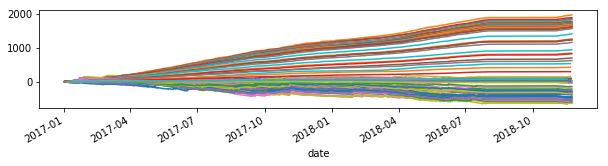

In [40]:
bb = bets[ (bets['country']=='FRA') & (bets['nb']==0) & (bets['odds_ref']>10) & (bets['odds_ref']<20) & (bets['pred']>0)].copy()
#bb = bb.groupby('id').filter(lambda r: r['num'].nunique() == 1)

graph_bb( bb, 'category')

#graph_bb(bb, 'category')

In [ ]:
len(bets[bets['next_pred_1'] != bets['pred']])

In [ ]:
df['winner_dividend'].describe()

In [ ]:
df['declared_player_count'].value_counts()